<a href="https://colab.research.google.com/github/c-daly/Notebooks/blob/main/PolynomialRegressionV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**


In [234]:
import numpy as np
from matplotlib import pyplot as plt


**Initial Values and Baseline Plot**

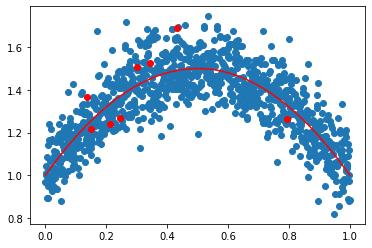

In [235]:

x = np.random.uniform(0, 1, 8)
y = []
noisy_y = []
for value in x:
  noise = np.random.normal(0, 0.1)
  y.append(1 + (2 * value) - (2 * value * value) + noise)


true_x = np.linspace(0, 1, 1000)
for value in true_x:
  noise = np.random.normal(0, 0.1)
  noisy_y.append(1 + (2 * value) - (2 * value * value) + noise)


true_y = 1 + (2 * true_x) - (2 * true_x ** 2) 

plt.plot(true_x, true_y, 'r-')
plt.scatter(true_x, noisy_y)
plt.plot(x, y, 'ro')

**Helper Methods**

In [236]:
def create_x_and_y(n=8):
  x = np.random.uniform(0, 1, n)
  y = [] 

  for value in x:
    noise = np.random.normal(0, 0.1)
    y.append(1 + (2 * value) - (2 * value ** 2) + np.random.normal(0, 0.1))
    
  return np.array(x), np.array(y)

def get_Y_from_X(X):
  y = []
  for value in X:
    noise = np.random.normal(0, 0.1)
    y.append(1 + (2 * value) - (2 * value ** 2) + np.random.normal(0, 0.1))
  
  print(y)
  return np.array(y)

def x_matrix_row(x, degree):
  
  row = []
  if degree >= 0:
    row.append(1)
  if degree >= 1:
    row.append(x)
  if degree >= 2:
    row.append(x ** 2)
  if degree >= 3:
    row.append(x ** 3)
  if degree >= 4:
    row.append(x ** 4)
  if degree >= 5:
    row.append(x ** 5)
  if degree >= 6:
    row.append(x ** 6)
  if degree >= 7:
    row.append(x ** 7)
  return row

def populate_x_matrix(x, degree):
  X = []
  for val in x:
    X.append(x_matrix_row(val, degree))
  
  return np.array(X)

def solve_normal_equations(X, Y):
  XTX = np.dot(X.T, X)
  XTY = np.dot(X.T, Y)
  return np.linalg.solve(XTX,XTY)

#def construct_y_from_x_matrix(X):
#  for cur_x in X:
#    print(cur_x)
#  return

#def get_estimated_y_for_d(d):
#  return 0

#def get_MSE_from_training_data():
#  MSE = []
#  for d in range(7):
#    MSE.append(get_estimated_y_for_d(d))
#  return MSE



**Setup**

In [237]:
# create initial x, y data points
x, y = create_x_and_y()

reference_x = true_x

# create training matrices
x1_matrix = populate_x_matrix(x, 1)
x2_matrix = populate_x_matrix(x, 2)
x3_matrix = populate_x_matrix(x, 3)
x4_matrix = populate_x_matrix(x, 4)
x5_matrix = populate_x_matrix(x, 5)
x6_matrix = populate_x_matrix(x, 6)
x7_matrix = populate_x_matrix(x, 7)

# create testing matrices
x1_test_matrix = populate_x_matrix(reference_x, 1)
x2_test_matrix = populate_x_matrix(reference_x, 2)
x3_test_matrix = populate_x_matrix(reference_x, 3)
x4_test_matrix = populate_x_matrix(reference_x, 4)
x5_test_matrix = populate_x_matrix(reference_x, 5)
x6_test_matrix = populate_x_matrix(reference_x, 6)
x7_test_matrix = populate_x_matrix(reference_x, 7)

# solve for theta
x1_coef = solve_normal_equations(x1_matrix, y)
x2_coef = solve_normal_equations(x2_matrix, y)
x3_coef = solve_normal_equations(x3_matrix, y)
x4_coef = solve_normal_equations(x4_matrix, y)
x5_coef = solve_normal_equations(x5_matrix, y)
x6_coef = solve_normal_equations(x6_matrix, y)
x7_coef = solve_normal_equations(x7_matrix, y)

# get expected training y values
x1_expected_y = x1_matrix @ x1_coef
x2_expected_y = x2_matrix @ x2_coef
x3_expected_y = x3_matrix @ x3_coef
x4_expected_y = x4_matrix @ x4_coef
x5_expected_y = x5_matrix @ x5_coef
x6_expected_y = x6_matrix @ x6_coef
x7_expected_y = x7_matrix @ x7_coef

# get expected test y values
x1_expected_test_y = x1_test_matrix @ x1_coef
x2_expected_test_y = x2_test_matrix @ x2_coef
x3_expected_test_y = x3_test_matrix @ x3_coef
x4_expected_test_y = x4_test_matrix @ x4_coef
x5_expected_test_y = x5_test_matrix @ x5_coef
x6_expected_test_y = x6_test_matrix @ x6_coef
x7_expected_test_y = x7_test_matrix @ x7_coef


**Degree 1**

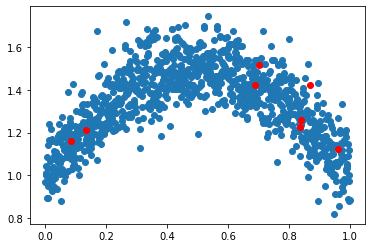

In [238]:

plt.scatter(true_x, noisy_y)
plt.plot(x,y, 'ro')


**Degree 2**

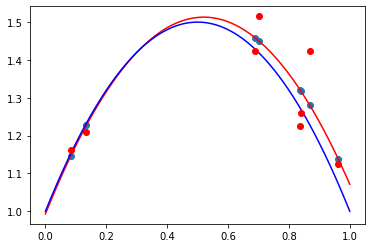

In [249]:
plt.plot(true_x, x2_expected_test_y, 'r-')
plt.scatter(x, x2_expected_y)
plt.plot(true_x, true_y, 'b-')
plt.plot(x,y, 'ro')

**Degree 3**

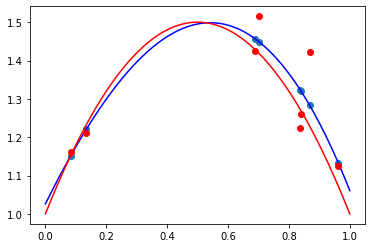

In [250]:
plt.plot(reference_x, x3_expected_test_y, 'b-')
plt.scatter(x, x3_expected_y)
plt.plot(true_x, true_y, 'r-')
plt.plot(x,y, 'ro')

**Degree 4**

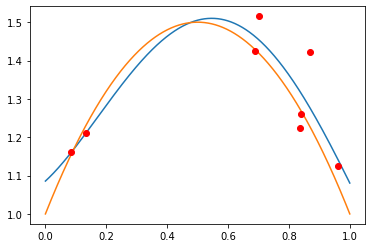

In [253]:
plt.plot(reference_x, x4_expected_test_y)
#plt.scatter(x, x4_expected_y)
plt.plot(true_x, true_y)
plt.plot(x,y, 'ro')

**Degree 5**

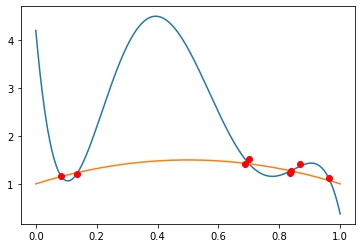

In [252]:
plt.plot(reference_x, x5_expected_test_y)
#plt.scatter(x, x5_expected_y)
plt.plot(true_x, true_y)
plt.plot(x,y, 'ro')

**Degree 6**

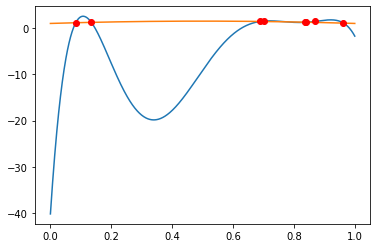

In [254]:
plt.plot(reference_x, x6_expected_test_y)
#plt.scatter(x, x6_expected_y)
plt.plot(true_x, true_y)
plt.plot(x,y, 'ro')

**Degree 7**

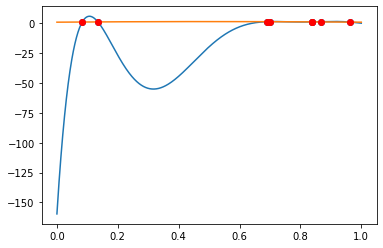

In [255]:
plt.plot(reference_x, x7_expected_test_y)
plt.scatter(x, x7_expected_y)
plt.plot(true_x, true_y)
plt.plot(x,y, 'ro')

**MSE Plots**

Training MSE

[0.01648689215233053, 0.004840011913344614, 0.0048242789664701595, 0.004785023056920263, 0.0027685928475337895, 3.818848393738206e-05, 2.8366831655239784e-05]


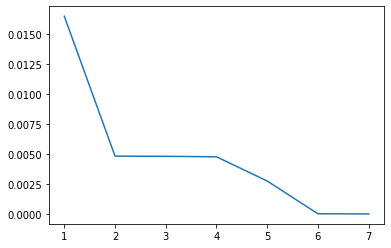

In [257]:
MSE_X = [1,2,3,4,5,6,7]
MSE_Y = [np.mean(np.square(y - x1_expected_y)), np.mean(np.square(y - x2_expected_y)), np.mean(np.square(y - x3_expected_y)), np.mean(np.square(y - x4_expected_y)), np.mean(np.square(y - x5_expected_y)), np.mean(np.square(y - x6_expected_y)), np.mean(np.square(y - x7_expected_y))]

plt.plot(MSE_X, MSE_Y)
print(MSE_Y)

Testing MSE

[0.026507175612279662, 0.0009063314297371735, 0.0009834184295876849, 0.0014060136664001035, 2.4412432146768106, 128.39835502900678, 1092.773181555233]


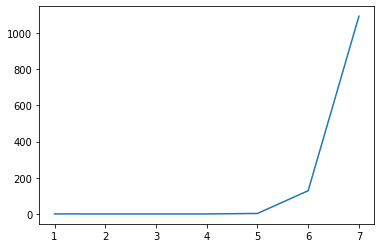

In [256]:
MSE_TEST_Y = [np.mean(np.square(true_y - x1_expected_test_y)), np.mean(np.square(true_y - x2_expected_test_y)), np.mean(np.square(true_y - x3_expected_test_y)), np.mean(np.square(true_y - x4_expected_test_y)), np.mean(np.square(true_y - x5_expected_test_y)), np.mean(np.square(true_y - x6_expected_test_y)), np.mean(np.square(true_y - x7_expected_test_y))]
plt.plot(MSE_X, MSE_TEST_Y)
print(MSE_TEST_Y)